In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
recent_grads = pd.read_csv("data/raw/recent-grads.csv")
women_stem = pd.read_csv("data/raw/women-stem.csv")

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


## Data Processing Questions

1. shall we exclude rows with small sample size?

## Correlation Heatmap

In [4]:
recent_grads.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [5]:
heatmap_col = recent_grads[['Total', 'Men', 'Women',
       'ShareWomen', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs']]

<AxesSubplot:>

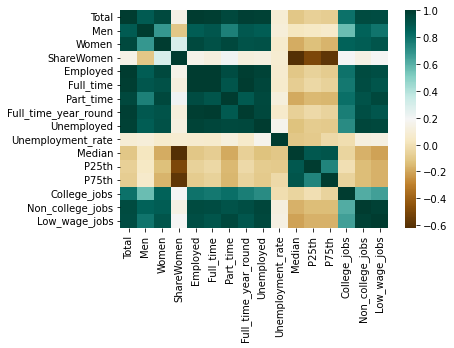

In [6]:
sns.heatmap(heatmap_col.corr(), cmap='BrBG')

## Gender ratio and Earning

Time series of correlations between women ratio and median earning?

In [7]:
def scatter_plot(df, x, y):
    plt.scatter(df[x], df[y])
    sns.regplot(x, y, data=df)
    corr = df[x].corr(df[y])
    print("correlation coefficient between", x, "and", y, "equals to:", corr)

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


correlation coefficient between ShareWomen and Median equals to: -0.6186897512131612


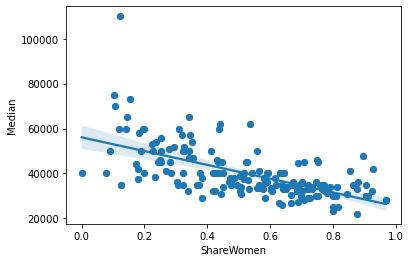

In [8]:
scatter_plot(recent_grads, 'ShareWomen', 'Median')

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


correlation coefficient between ShareWomen and P25th equals to: -0.5001986323939086


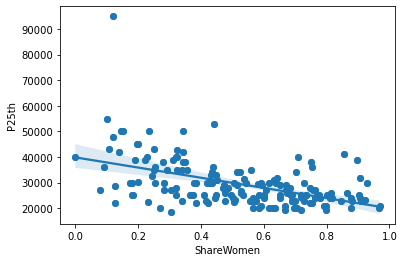

In [9]:
scatter_plot(recent_grads, 'ShareWomen', 'P25th')

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


correlation coefficient between ShareWomen and P75th equals to: -0.5869321632626859


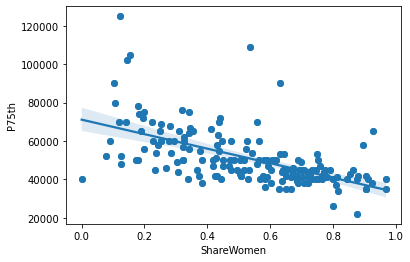

In [10]:
scatter_plot(recent_grads, 'ShareWomen', 'P75th')

In [11]:
recent_grads.sort_values('Median')[['Major', 'ShareWomen', 'Median']].head(10)

,Major,ShareWomen,Median
172,LIBRARY SCIENCE,0.877960,22000
171,COUNSELING PSYCHOLOGY,0.798746,23400
169,EDUCATIONAL PSYCHOLOGY,0.817099,25000
170,CLINICAL PSYCHOLOGY,0.799859,25000
168,ZOOLOGY,0.637293,26000
167,COMPOSITION AND RHETORIC,0.629505,27000
166,DRAMA AND THEATER ARTS,0.666119,27000
165,OTHER FOREIGN LANGUAGES,0.690111,27500
164,EARLY CHILDHOOD EDUCATION,0.968954,28000
163,COMMUNICATION DISORDERS SCIENCES AND SERVICES,0.967998,28000


## Majors with greatest earning differences

In [12]:
recent_grads['Diff_P75_P25'] = recent_grads['P75th'] - recent_grads['P25th']

In [13]:
recent_grads.sort_values('Diff_P75_P25', ascending = False).head(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Diff_P75_P25
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,827,33,0.021167,62000,31500,109000,972,500,220,77500
60,61,6108,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,23551.0,8697.0,14854.0,Health,0.630716,38,16620,...,9131,977,0.055521,40000,20000,90000,11573,4493,1121,70000
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,340,16,0.024096,73000,50000,105000,456,176,0,55000
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,1449,400,0.177226,65000,50000,102000,1142,657,244,52000
14,15,2409,ENGINEERING MECHANICS PHYSICS AND SCIENCE,4321.0,3526.0,795.0,Engineering,0.183985,30,3608,...,2004,23,0.006334,58000,25000,74000,2439,947,263,49000


## Majors with highest unemployment rate

In [14]:
recent_grads.sort_values('Unemployment_rate', ascending = False).head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Diff_P75_P25
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,1449,400,0.177226,65000,50000,102000,1142,657,244,52000
89,90,5401,PUBLIC ADMINISTRATION,5629.0,2947.0,2682.0,Law & Public Policy,0.476461,46,4158,...,2952,789,0.159491,36000,23000,60000,919,2313,496,37000
84,85,2107,COMPUTER NETWORKING AND TELECOMMUNICATIONS,7613.0,5291.0,2322.0,Computers & Mathematics,0.305005,97,6144,...,4369,1100,0.151850,36400,27000,49000,2593,2941,352,22000
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,1293,368,0.149048,25000,25000,40000,986,870,622,15000
29,30,5402,PUBLIC POLICY,5978.0,2639.0,3339.0,Law & Public Policy,0.558548,55,4547,...,2776,670,0.128426,50000,35000,70000,1550,1871,340,35000
105,106,2001,COMMUNICATION TECHNOLOGIES,18035.0,11431.0,6604.0,Computers & Mathematics,0.366177,208,14779,...,9085,2006,0.119511,35000,25000,45000,4545,8794,2495,20000
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,388,85,0.117241,75000,55000,90000,350,257,50,35000
53,54,2101,COMPUTER PROGRAMMING AND DATA PROCESSING,4168.0,3046.0,1122.0,Computers & Mathematics,0.269194,43,3257,...,2453,419,0.113983,41300,20000,46000,2024,1033,263,26000
79,80,5504,GEOGRAPHY,18480.0,11404.0,7076.0,Social Science,0.382900,179,14057,...,8628,1799,0.113459,38000,30000,50000,5350,6830,1905,20000
58,59,1401,ARCHITECTURE,46420.0,25463.0,20957.0,Engineering,0.451465,362,34158,...,20026,4366,0.113332,40000,31000,50000,16178,13724,4221,19000
